# Propaganda analysis - keyword extraction from newspapers

### Load Impresso OCR data for french WW1 content

In [2]:
import pandas as pd

df_french = pd.read_csv("https://mbien-public.s3.eu-central-1.amazonaws.com/dh-412/french.csv", sep=";")
df_french.head()

,uid,type,language,title,size,country,newspaper,issue,pages,nb_pages,...,year,is_on_front,date,persons_mentioned,locations_mentioned,content,access_right,content_provider,is_content_available,"[total:10000,available:10000]"
0,GDL-1914-07-29-a-i0005,NaN,fr,L'Italie et la guerre,371,CH,GDL,GDL-1914-07-29-a,"1,2",2,...,1914,True,1914-07-29T00:00:00Z,NaN,Italie|Rome|Italie|Italie|Italie|Autriche|Ital...,L'Italie et la guerre (Lettre Ae Honte) (De no...,OpenPrivate,SNL,y,NaN
1,GDL-1914-07-29-a-i0029,NaN,fr,CHRONIQUE VAtAISANNE,279,CH,GDL,GDL-1914-07-29-a,4,1,...,1914,False,1914-07-29T00:00:00Z,NaN,Sion|Suisse,"CHRONIQUE VAtAISANNE Sion, 27 juillet. Les vin...",OpenPrivate,SNL,y,NaN
2,GDL-1914-08-07-a-i0028,NaN,fr,NaN,1717,CH,GDL,GDL-1914-08-07-a,3,1,...,1914,False,1914-08-07T00:00:00Z,Les Anglais|Les Hollandais|Les Autrichiens|Con...,Angleterre|Autriche|Russie|Bâle|Mulhouse|Berli...,La guerre sur mer. raqueDots capturés. Londres...,OpenPrivate,SNL,y,NaN
3,GDL-1914-08-01-a-i0026,NaN,fr,A la population de Lausanne,287,CH,GDL,GDL-1914-08-01-a,3,1,...,1914,False,1914-08-01T00:00:00Z,NaN,Lausanne|Lausanne|Vevey|Genève,A la population de Lausanne Le comité de la So...,OpenPrivate,SNL,y,NaN
4,GDL-1914-08-01-a-i0023,NaN,fr,NOUVELLES DIVERSES,40,CH,GDL,GDL-1914-08-01-a,2,1,...,1914,False,1914-08-01T00:00:00Z,NaN,Rome,NOUVELLES DIVERSES Bnlaarie. Le gouvernement d...,OpenPrivate,SNL,y,NaN


### Prepare the text processing and tokenization pipeline

In [3]:
df_french.content

0       L'Italie et la guerre (Lettre Ae Honte) (De no...
1       CHRONIQUE VAtAISANNE Sion, 27 juillet. Les vin...
2       La guerre sur mer. raqueDots capturés. Londres...
3       A la population de Lausanne Le comité de la So...
4       NOUVELLES DIVERSES Bnlaarie. Le gouvernement d...
                              ...                        
9995    Etats-Unis et Allemagne L'affaire du " Lyman L...
9996    La situation en Allemagne Je vais essayé de tr...
9997    En Russie Démarche de la noblesse 'en faveur d...
9998    CANTONJDE VÂUO Grand Conseil Séance du mercred...
9999    Les Sports 8 PORTS D'HIVER i Le championnat de...
Name: content, Length: 10000, dtype: object

In [4]:
import spacy
from tqdm.notebook import tqdm

tqdm.pandas()

nlp_fr = spacy.load('fr_core_news_sm', disable=["ner", "parser"])
nlp_de = spacy.load('de_core_news_sm', disable=["ner", "parser"])

/home/mbien/.local/lib/python3.8/site-packages/tqdm/std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

# preprocessing
pos_to_keep = ['ADJ', 'ADV', 'NOUN', 'PROPN', 'VERB']

def lematization_pos_tagging(spacy_handle, text):
    doc = spacy_handle(str(text))
    lemmatized = [x.lemma_ for x in doc if x.pos_ in pos_to_keep and x.is_stop != True]
    return lemmatized


In [ ]:
tokens_french = df_french.content.progress_apply(lambda row: ' '.join(lematization_pos_tagging(nlp_fr, row)))

### Do the same for french reference corpus (non-WW1 subcorpus)

In [11]:
df_french_reference = pd.read_csv("french_reference.csv", sep=";")
tokens_reference_french = df_french_reference.content.progress_apply(lambda row: ' '.join(lematization_pos_tagging(nlp_fr, row)))

### Save the french files to the pickle (uploaded to S3)

In [13]:
import pickle
with open("tokens_french.pickle", "wb") as f:
    pickle.dump(tokens_french, f)

with open("tokens_reference_french.pickle", "wb") as f:
    pickle.dump(tokens_reference_french, f)

### Do the same for german newspapers

In [6]:
df_german = pd.read_csv("german.csv", sep=";")
tokens_german = df_german.content.progress_apply(lambda row: ' '.join(lematization_pos_tagging(nlp_de, row)))

In [9]:
tokens_german

0       Morgenblatt ZeUnn Mrchtt M MgW Mittwoch mpril ...
1       Grftes Morgenblatt Dtt Mchtt Mnz M WM Mittwoch...
2       Kandel YerkeHr elreidebilrst Zsnch Getreidebör...
3       trwerb Vettrauende plötzlich Pfla Ver fchwleri...
4       lnlpalti ° l Np Neu bonne Insertionspreise Zür...
                              ...                        
7380    ßidgenossenschafi Dementi Nov . zuständig Ttcl...
7381    VlDNNN l tusltiyle vanml c besonder Landes-Vür...
7382    Macke vcsbllw sel Än-tr Vl VndcrN ilbcrslnssif...
7383    M KWmdes WarnWzsz^lchen Ilsza H letzt Rede Irr...
7384    sammlung sprache halten Demonstrant beabsichti...
Name: content, Length: 7385, dtype: object

In [7]:
df_german_reference = pd.read_csv("german_reference.csv", sep=";")
tokens_reference_german = df_german_reference.content.progress_apply(lambda row: ' '.join(lematization_pos_tagging(nlp_de, row)))

In [8]:
import pickle
with open("tokens_german.pickle", "wb") as f:
    pickle.dump(tokens_german, f)

with open("tokens_reference_german.pickle", "wb") as f:
    pickle.dump(tokens_reference_german, f)

# Depickle and analyse all

In [1]:
import pandas as pd

tokens_french = pd.read_pickle("https://mbien-public.s3.eu-central-1.amazonaws.com/dh-412/tokens_french.pickle")
tokens_reference_french = pd.read_pickle("https://mbien-public.s3.eu-central-1.amazonaws.com/dh-412/tokens_reference_french.pickle")

In [2]:
tokens_reference_french

0       nouvelle ™ édition escadre français baltique r...
1       offre place demande suite bon sommelièr puotog...
2       chronique zurichois correspondant j ~ v idée m...
3       banque cantonal ineuchâtelois banque délivre j...
4       ANNONCES publicita société Anonyme Suisse publ...
                              ...                        
9995    attentat Prague Prague janvier enquête prélimi...
9996    Francfort janvier gazette Francfort apprendre ...
9997    | iHHrfiii | iihm Hj ii iiiiuiiiiihhifii ili n...
9998    Lausanne janvier barrage illusoire discours mo...
9999    confédération suisse legation petrograd départ...
Name: content, Length: 10000, dtype: object

#### Unigrams

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf.fit(tokens_reference_french)

confederation = tfidf.transform(tokens_french)
tfidf_fr_df = pd.DataFrame(confederation.mean(axis=0).T)
tfidf_fr_df.index = tfidf.get_feature_names()
tfidf_fr_df = tfidf_fr_df.sort_values(by=0, ascending=False)
tfidf_fr_df.index[:100]

Index(['guerre', 'allemand', 'monsieur', 'allemagne', 'suisse', 'grand',
       'pays', 'gouvernement', 'français', 'faire', 'armée', 'france',
       'peuple', 'italie', 'devoir', 'jour', 'paix', 'journal', 'pouvoir',
       'politique', 'conseil', 'général', 'prendre', 'militaire', 'nouveau',
       'fédéral', 'russe', 'homme', 'angleterre', 'situation', 'paris',
       'ennemi', 'temps', 'italien', 'donner', 'neutralité', 'allié',
       'vouloir', 'août', 'prisonnier', 'etat', 'lausanne', 'heure', 'anglais',
       'droit', 'fr', 'falloir', 'neutre', 'belgique', 'étranger', 'russie',
       'venir', 'ministre', 'mesure', 'question', 'savoir', 'force', 'voir',
       'million', 'mettre', 'autriche', 'prix', 'belge', 'troupe', 'bon',
       'berlin', 'mois', 'dernier', 'front', 'point', 'national', 'pourcent',
       'puissance', 'septembre', 'trouver', 'maison', 'an', 'croire',
       'intérêt', 'londres', 'nation', 'soldat', 'petit', 'vue', 'déjà',
       'octobre', 'empire', 'mome

In [37]:
# Selected words for freq analysis
' '.join([v for v in tfidf_fr_df[:50].index.values])

'guerre allemand monsieur allemagne suisse grand pays gouvernement français faire armée france peuple italie devoir jour paix journal pouvoir politique conseil général prendre militaire nouveau fédéral russe homme angleterre situation paris ennemi temps italien donner neutralité allié vouloir août prisonnier etat lausanne heure anglais droit fr falloir neutre belgique étranger'

### Unigram frequency analysis

In [40]:
def raw2counts(df):
    df = pd.DataFrame(df.data.values[0]).set_index("label")["items"].apply(pd.Series).stack().reset_index().drop("level_1", axis=1)
    df.columns = ["label", "data"]
    df = pd.concat([df, df["data"].apply(pd.Series)], axis=1).drop("data", axis=1)
    return df

Text(0.5, 1.0, 'Frequency of mentions in Swiss newspapers of extracted words from war propaganda (French)')

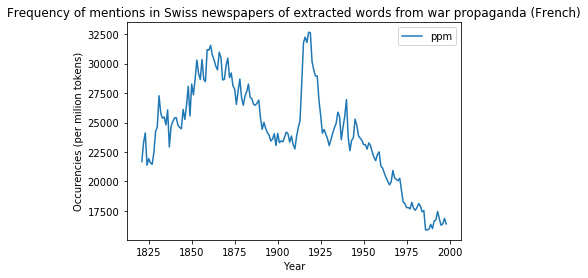

In [54]:
trends_french = pd.read_json('unigrams_all_fr.json', lines=True)
trends_french = raw2counts(trends_french)
trends_french = trends_french.groupby(pd.to_datetime(trends_french.date).dt.year).sum().reset_index()
trends_french = trends_french[(trends_french.date>1820) & (trends_french.date<2000)]
ax = trends_french.plot(x='date', y='ppm')
ax.set_ylabel("Occurencies (per milion tokens)")
ax.set_xlabel("Year")
ax.set_title("Frequency of mentions in Swiss newspapers of extracted words from war propaganda (French)")

#### Ngrams

In [7]:
tfidf = TfidfVectorizer(ngram_range=(2,3))
tfidf.fit(tokens_reference_french)

confederation = tfidf.transform(tokens_french)
tfidf_fr_df = pd.DataFrame(confederation.mean(axis=0).T)
tfidf_fr_df.index = tfidf.get_feature_names()
tfidf_fr_df = tfidf_fr_df.sort_values(by=0, ascending=False)
tfidf_fr_df.index[:100]

Index(['conseil fédéral', 'sous marin', 'etats unis', 'prisonnier guerre',
       'peut être', 'autriche hongrie', 'état major', 'point vue',
       'guerre naval', 'grand hôtel', 'grande bretagne', 'début guerre',
       'guerre actuel', 'prix modérer', 'new york', 'austro allemand',
       'chemin fer', 'monsieur venizelos', 'temps guerre', 'pays neutre',
       'croix rouge', 'déclaration guerre', 'austro hongrois', 'timbre poste',
       'opinion public', 'affaire étranger', 'gazette lausanne',
       'allemagne autriche', 'armée allemand', 'grand nombre',
       'gouvernement allemand', 'commencement guerre', 'marin allemand',
       'monsieur asquith', 'maison peuple', 'impôt guerre',
       'france angleterre', 'suisse allemand', 'président conseil',
       'confort moderne', 'peuple allemand', 'prix guerre', 'champ bataille',
       'conseil etat', 'gouvernement italien', 'sous marin allemand',
       'ordre jour', 'guerre aérien', 'emprunt guerre', 'monde entier',
       'hôte

# Topics FR

In [77]:
def vis_bigram(sel, text):
    sel = sel[sel.label.isin(text.split(" "))]
    sel = sel.groupby(pd.to_datetime(sel.date).dt.year).sum().reset_index()
    ax = sel.plot(x='date', y='ppm')
    ax.set_ylabel("Occurencies (per milion tokens)")
    ax.set_xlabel("Year")
    ax.set_title("Frequency of mentions in Swiss newspapers of "+text)

trends_french_selected = pd.read_json('unigrams_selected_fr.json', lines=True)
trends_french_selected = raw2counts(trends_french_selected)
trends_french_selected.date = pd.to_datetime(trends_french_selected.date)
trends_french_selected = trends_french_selected[(trends_french_selected.date.dt.year>1820) & (trends_french_selected.date.dt.year<2000)]
trends_french_selected

,label,value,total,ppm,date
19,conseil,257,364473,705.127677,1821-01-01
20,conseil,258,371992,693.563302,1822-01-01
21,conseil,335,552939,605.853449,1823-01-01
22,conseil,498,558672,891.399605,1824-01-01
23,conseil,556,607464,915.280576,1825-01-01
...,...,...,...,...,...
1965,public,3944,16301575,241.939813,1994-01-01
1966,public,3397,14827343,229.103758,1995-01-01
1967,public,4781,19385200,246.631451,1996-01-01
1968,public,5227,22910557,228.148098,1997-01-01


### 1. conseil fédéral
power centraliation change with historical context and time


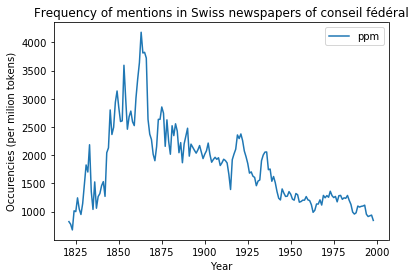

In [78]:
vis_bigram(trends_french_selected, "conseil fédéral")

### 2. chemin fer
the national treasure and strategic point


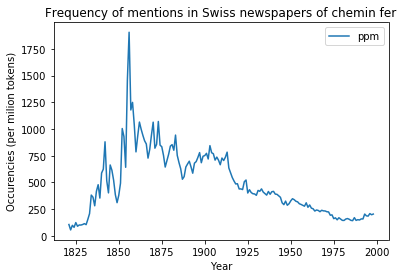

In [70]:
vis_bigram(trends_french_selected, "chemin fer")

### 3. pays neutre

swiss neutrality


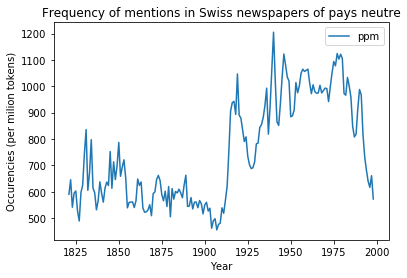

In [71]:
vis_bigram(trends_french_selected, "pays neutre")

### 4. croix rouge

probably the main impact factor of swiss on the war


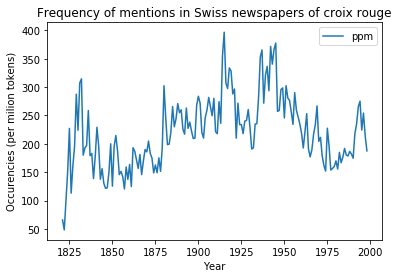

In [72]:
vis_bigram(trends_french_selected, "croix rouge")

### 5. opinion public

interesting to see it here, I assume politicians need to take it into account very seriously in CH

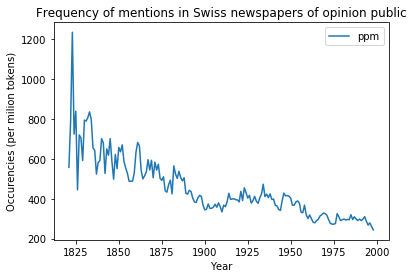

In [73]:
vis_bigram(trends_french_selected, "opinion public")

### Now in GSW

In [32]:
import pandas as pd

tokens_german = pd.read_pickle("https://mbien-public.s3.eu-central-1.amazonaws.com/dh-412/tokens_german.pickle")
tokens_reference_german = pd.read_pickle("https://mbien-public.s3.eu-central-1.amazonaws.com/dh-412/tokens_reference_german.pickle")

In [33]:
tokens_german

0       Morgenblatt ZeUnn Mrchtt M MgW Mittwoch mpril ...
1       Grftes Morgenblatt Dtt Mchtt Mnz M WM Mittwoch...
2       Kandel YerkeHr elreidebilrst Zsnch Getreidebör...
3       trwerb Vettrauende plötzlich Pfla Ver fchwleri...
4       lnlpalti ° l Np Neu bonne Insertionspreise Zür...
                              ...                        
7380    ßidgenossenschafi Dementi Nov . zuständig Ttcl...
7381    VlDNNN l tusltiyle vanml c besonder Landes-Vür...
7382    Macke vcsbllw sel Än-tr Vl VndcrN ilbcrslnssif...
7383    M KWmdes WarnWzsz^lchen Ilsza H letzt Rede Irr...
7384    sammlung sprache halten Demonstrant beabsichti...
Name: content, Length: 7385, dtype: object

#### Unigrams

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(min_df=2) # The dataset is too big to fit in memory (mostly due to poor OCR), let's facilitate it a little bit
tfidf.fit(tokens_reference_german)

eidgenossenschaft = tfidf.transform(tokens_german)
tfidf_de_df = pd.DataFrame(eidgenossenschaft.mean(axis=0).T)
tfidf_de_df.index = tfidf.get_feature_names()
tfidf_de_df = tfidf_de_df.sort_values(by=0, ascending=False)
tfidf_de_df.index[:50]

Index(['krieg', 'deutsch', 'de', 'deutschland', 'fr', 'land', 'feind', 'staat',
       'stehen', 'lassen', 'kriegsschauplatz', 'ge', 'england', 'bringen',
       'regierung', 'feindlich', 'finden', 'front', 'volk', 'truppe',
       'italien', 'telephon', 'friede', 'di', 'dr', 'nehmen', 'schweiz',
       'bleiben', 'letzt', 'ver', 'frankreich', 'frau', 'fein', 'sehen', 'unb',
       'havas', 'dah', 'prozent', 'kampf', 'russisch', 'sept', 'armee',
       'stellen', 'mai', 'frage', 'halten', 'geben', 'liegen', 'leben',
       'schwer'],
      dtype='object')

In [38]:
# Selected words for freq analysis
' '.join([v for v in tfidf_de_df[:50].index.values])

'vereinigte staat fr fr täglich ausgabe wiener korr sept havas staat deutschland oesterreich ungarn st galle ausbruch krieg havas amtliche della sera neutral staat deutsch land de krieg amtliche mitteilung neutral land mill fr deutsch volk kriegführend staat wolff amtlich öffentlich meinung mai havas nov havas europäisch krieg deutsch truppe deut schen schwer verlust prof dr deutsch regierung okt havas kanton zürich verfügung stellen sept wolff million franke frankreich england england frankreich frau kind deutsch reich beginn krieg italien mailand aug havas fangen nehmen dr meyer deutsch seite juni havas stadt zürich unb bie deutsch österreichisch präsident wilson anspruch nehmen'

### Unigram frequency analysis

Text(0.5, 1.0, 'Frequency of mentions in Swiss newspapers of extracted words from war propaganda (German)')

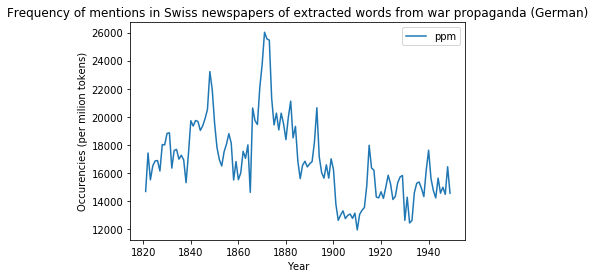

In [52]:
trends_german = pd.read_json('unigrams_all_de.json', lines=True)
trends_german = raw2counts(trends_german)
trends_german = trends_german.groupby(pd.to_datetime(trends_german.date).dt.year).sum().reset_index()
trends_german = trends_german[(trends_german.date>1820) & (trends_german.date<1950)]

ax = trends_german.plot(x='date', y='ppm')
ax.set_ylabel("Occurencies (per milion tokens)")
ax.set_xlabel("Year")
ax.set_title("Frequency of mentions in Swiss newspapers of extracted words from war propaganda (German)")

#### Ngrams

In [35]:
tfidf = TfidfVectorizer(ngram_range=(2,3), min_df=3)
tfidf.fit(tokens_reference_german)

eidgenossenschaft = tfidf.transform(tokens_german)
tfidf_de_df = pd.DataFrame(eidgenossenschaft.mean(axis=0).T)
tfidf_de_df.index = tfidf.get_feature_names()
tfidf_de_df = tfidf_de_df.sort_values(by=0, ascending=False)
tfidf_de_df.index[:100]

Index(['vereinigte staat', 'fr fr', 'täglich ausgabe', 'wiener korr',
       'sept havas', 'staat deutschland', 'oesterreich ungarn', 'st galle',
       'ausbruch krieg', 'havas amtliche', 'della sera', 'neutral staat',
       'deutsch land', 'de krieg', 'amtliche mitteilung', 'neutral land',
       'mill fr', 'deutsch volk', 'kriegführend staat', 'wolff amtlich',
       'öffentlich meinung', 'mai havas', 'nov havas', 'europäisch krieg',
       'deutsch truppe', 'deut schen', 'schwer verlust', 'prof dr',
       'deutsch regierung', 'okt havas', 'kanton zürich', 'verfügung stellen',
       'sept wolff', 'million franke', 'frankreich england',
       'england frankreich', 'frau kind', 'deutsch reich', 'beginn krieg',
       'italien mailand', 'aug havas', 'fangen nehmen', 'dr meyer',
       'deutsch seite', 'juni havas', 'stadt zürich', 'unb bie',
       'deutsch österreichisch', 'präsident wilson', 'anspruch nehmen',
       'deutsch kaiser', 'gestern abend', 'nov wolff', 'letzt woche',


# Topics GSW

In [79]:
trends_de_selected = pd.read_json('unigrams_selected_de.json', lines=True)
trends_de_selected = raw2counts(trends_de_selected)
trends_de_selected.date = pd.to_datetime(trends_de_selected.date)
trends_de_selected = trends_de_selected[(trends_de_selected.date.dt.year>1820) & (trends_de_selected.date.dt.year<1950)]
trends_de_selected

,label,value,total,ppm,date
41,Galle,93,857411,108.466068,1821-01-01
42,Galle,200,897935,222.733271,1822-01-01
43,Galle,157,942073,166.653752,1823-01-01
44,Galle,309,887994,347.975324,1824-01-01
45,Galle,145,764683,189.621059,1825-01-01
...,...,...,...,...,...
1533,nehmen,2715,25614121,105.996220,1945-01-01
1534,nehmen,2710,26509920,102.225884,1946-01-01
1535,nehmen,2820,23067868,122.247968,1947-01-01
1536,nehmen,3444,26531059,129.810122,1948-01-01


### 1. St. Galle - the major economic crysis in the city due to war

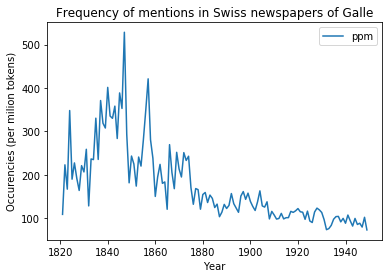

In [80]:
vis_bigram(trends_de_selected, "Galle")

### 2. neutral staat, neutral land, kriegführend staat - strong difference who is who there


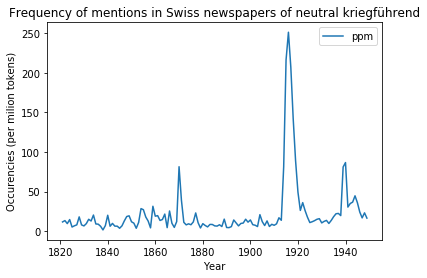

In [82]:
vis_bigram(trends_de_selected, "neutral kriegführend")

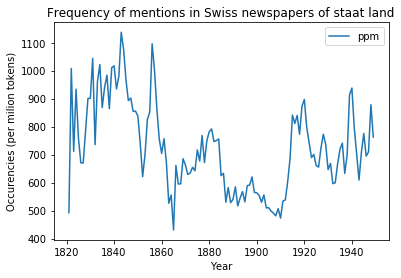

In [83]:
vis_bigram(trends_de_selected, "staat land")

### 3. öffentlich meinung - public opinion is important again

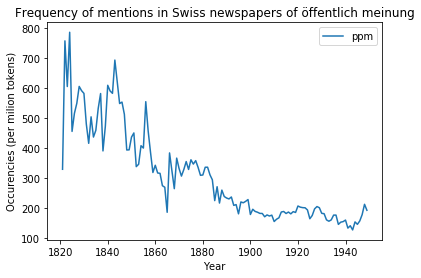

In [84]:
vis_bigram(trends_de_selected, "öffentlich meinung")

### 4. stellung nehmen - not 100% sure but it seems to be related to deciding on which side they want to fight

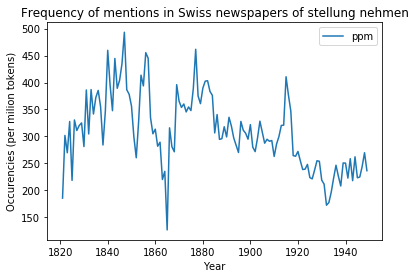

In [85]:
vis_bigram(trends_de_selected, "stellung nehmen")